<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>


# PRE HOMEWORK

# Case 3: Fifa 2022 world cup

<a target="_blank" href="https://colab.research.google.com/github/DACSS-CSSmeths/Networks_intro/blob/main/case3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Let me use some information about countries from the 2022 [Fifa World Cup](https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads). I have added som attributes for the countrues and the clubs with the help from ChatGpt (these attributes may not be accurate).

* For the _club_: if the club was the national champion in its country the year before the world cup
* For the _country_: if the country  is considered developed or not.

In [1]:
from IPython.display import IFrame

IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjk__2p0MTF5Oh_qmJ9PQpk-QN71HXKzxIYBcvKe09YiGYDD9tL1FlZ7BIiAL2rx_4wdF8mOWziGl9/pubhtml', 800, 350)

Let's use the data from GitHub:

In [2]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


This shows data for every player in the cup. Let's pay attention to three variables:

In [3]:
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Pay attention! ... it is obvious we could have a _bipartite_ network here.

Let's try this one with players and club:

In [4]:
import networkx as nx

fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [6]:
from networkx.algorithms import bipartite


players_nodes,clubs_nodes = bipartite.sets(fifanet1)
# Draw bipartite graph
pos = nx.bipartite_layout(fifanet1, players_nodes,align='horizontal',aspect_ratio=1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=True, node_color = color_list)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

As you see, here you have a problem with the code
```
players_nodes,clubs_nodes = bipartite.sets(fifanet1)
```

That is bad news. Let me show you an alternative way to that line of code:

In [7]:
players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
clubs_nodes = set(fifanet1) - players_nodes

Now, draw the graph:

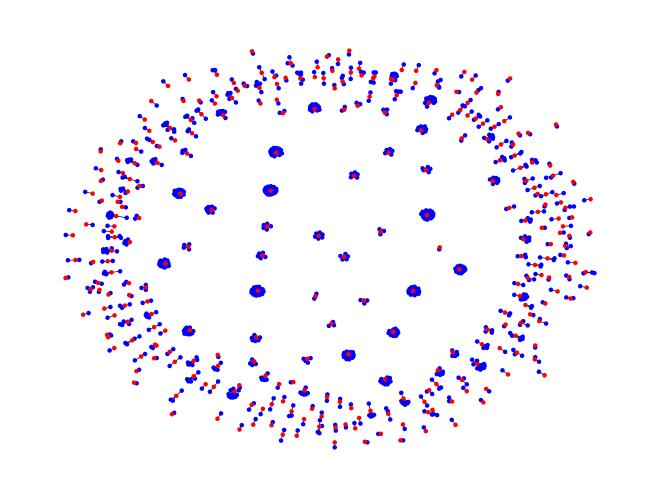

In [8]:
pos = nx.spring_layout(fifanet1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

As you may have guessed, the clubs divide the players, so in the data we have, it is NOT possible that a player belongs to two clubs. In our example above, an actor can be in more than one movie. If you install pydot you could see this graph:

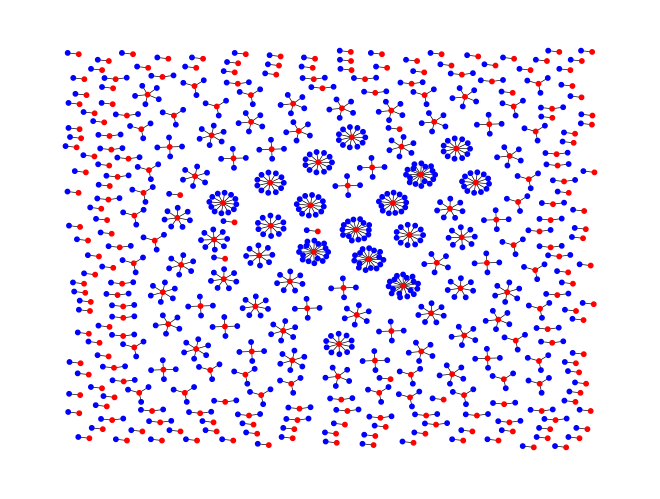

In [9]:
pos = nx.nx_pydot.graphviz_layout(fifanet1)
nx.draw(fifanet1, pos=pos, with_labels=False, node_size=10, node_color = color_list,width=0.5)

I created a bipartite graph between players and countries. I added the players and countries as the nodes to complete such.

In [10]:
import networkx as nx

fifanet2 = nx.Graph()
fifanet2.add_nodes_from(fifa.name, bipartite=0)
fifanet2.add_nodes_from(fifa.nationality, bipartite=1)
fifanet2.add_edges_from([c for c in zip(fifa.name, fifa.nationality)])

In [11]:
players_nodes = {n for n, d in fifanet2.nodes(data=True) if d["bipartite"] == 0}
countries_nodes = set(fifanet2) - players_nodes

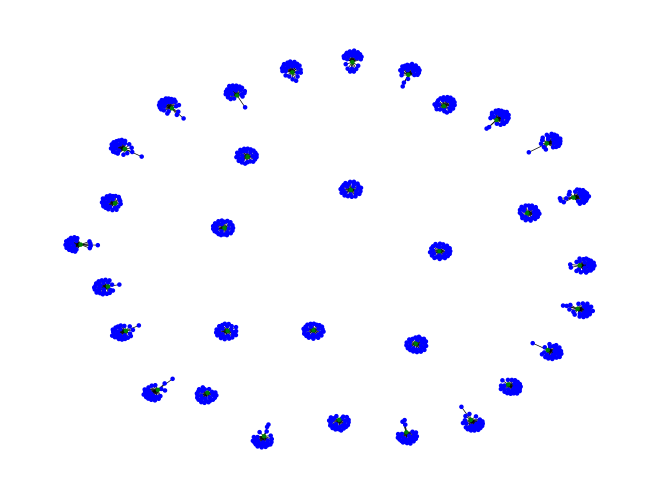

In [12]:
pos = nx.spring_layout(fifanet2)
color_dict = {0:'b',1:'g'}
color_list = [color_dict[i[1]] for i in fifanet2.nodes.data('bipartite')]
nx.draw(fifanet2, pos=pos, with_labels=False, node_size=5, width=0.5, node_color=color_list)

In [13]:
is_connected = nx.is_connected(fifanet2)
print("Is the network connected?", is_connected)

Is the network connected? False


As we see here, player-country network would not work, as there is no network connection!

In [14]:
largest_cc = max(nx.connected_components(fifanet2), key=len)
fifanet2_giant = fifanet2.subgraph(largest_cc).copy()

I created a bipartite graph between clubs and countries. I added clubs, then countries, and then proceeded to add edges between clubs and countries.

In [15]:
club_country_net = nx.Graph()
club_country_net.add_nodes_from(fifa.club, bipartite=0)  # Clubs
club_country_net.add_nodes_from(fifa.nationality, bipartite=1)  # Countries
club_country_net.add_edges_from(zip(fifa.club, fifa.nationality))  # Edges

In [16]:
# I extracted the unique country nodes.

country_nodes = {n for n, d in club_country_net.nodes(data=True) if d["bipartite"] == 1}
country_projection = nx.bipartite.weighted_projected_graph(club_country_net, country_nodes)

In [17]:
# I ensured I only projected the correct set of country nodes before creating my projected country network with the node attributes.

countries_nodes = {n for n, d in club_country_net.nodes(data=True) if d["bipartite"] == 1}

country_projection = nx.bipartite.weighted_projected_graph(club_country_net, countries_nodes)

for country in country_projection.nodes():
    if country in club_country_net.nodes:  # Ensure the node exists in the original graph
        country_projection.nodes[country].update(club_country_net.nodes[country])

In [18]:
for country, attrs in list(country_projection.nodes(data=True))[:5]:  # Show first 5 countries
    print(country, attrs)

USA {'bipartite': 1}
Uruguay {'bipartite': 1}
Cameroon {'bipartite': 1}
Netherlands {'bipartite': 1}
Iran {'bipartite': 1}


In [19]:
is_connected = nx.is_connected(country_projection)
print(f"Is the country network connected? {is_connected}")

Is the country network connected? True


Now the network connects! I proceed on plotting the results.

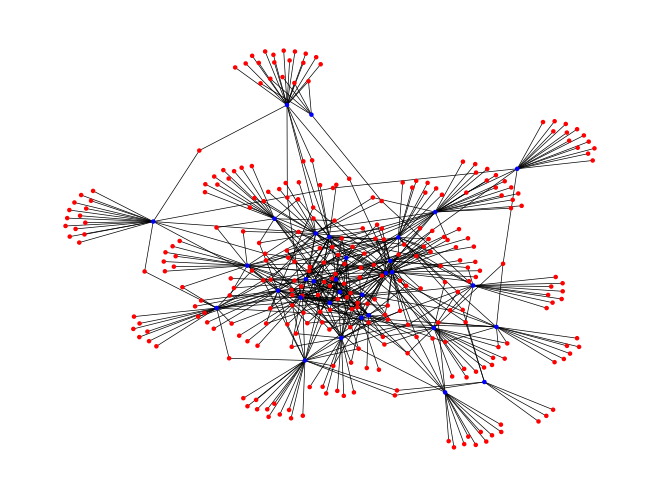

In [20]:
pos = nx.spring_layout(club_country_net)
color_dict = {0:'r', 1:'b'}
color_list = [color_dict[i[1]] for i in club_country_net.nodes.data('bipartite')]
nx.draw(club_country_net, pos=pos, with_labels=False, node_size=5, width=0.5, node_color=color_list)

In [21]:
density = nx.density(country_projection)
print(f"Network density: {density:.4f}")

Network density: 0.6149


As we see, the density is 0.6149, meaning there is alot of connectedness.

In [22]:
# I computed centrality measures.

degree_centrality = nx.degree_centrality(country_projection)
betweenness_centrality = nx.betweenness_centrality(country_projection)
closeness_centrality = nx.closeness_centrality(country_projection)

I created a DataFrame with centrality measures.

In [23]:
centrality_df = pd.DataFrame({
    "Country": degree_centrality.keys(),
    "Degree Centrality": degree_centrality.values(),
    "Betweenness Centrality": betweenness_centrality.values(),
    "Closeness Centrality": closeness_centrality.values()
})

In [24]:
nx.write_graphml(country_projection, "country_projection.graphml")

Above is what shows from my code. The club-country network is indeed true.


Below I project the bipartite graph to create the club-club graph, and then proceed to draw the club-club projection.

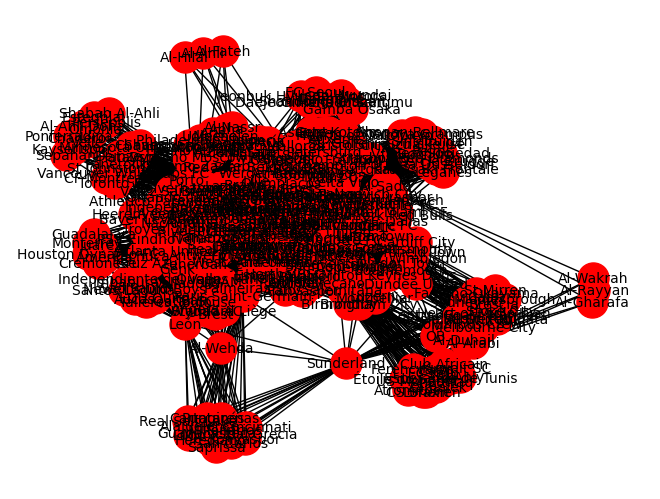

In [25]:
club_club_projectionupdated = bipartite.projected_graph(club_country_net, clubs_nodes)

pos_club_club = nx.spring_layout(club_club_projectionupdated)
nx.draw(club_club_projectionupdated, pos=pos_club_club, with_labels=True, node_size=500, node_color='r', font_size=10)

Above is what I got as a result.

Edges within Club-Club projection: The edges represent clubs that share players from the same countries. If two clubs share players from a common nationality, there will be an edge between them.

That is seriously all over the place. Lets continue.



Below, I projected the bipartite graph to create the country-country graph, and then drew the country-country projection.

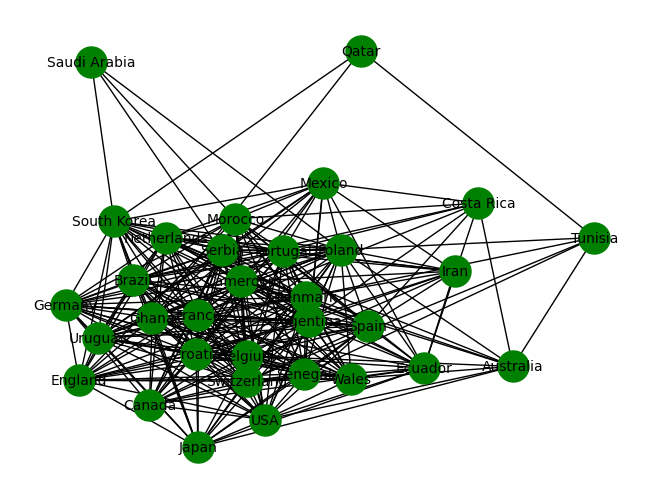

In [26]:
country_country_projectionupdated = bipartite.projected_graph(club_country_net, countries_nodes)

pos_country_country = nx.spring_layout(country_country_projectionupdated)
nx.draw(country_country_projectionupdated, pos=pos_country_country, with_labels=True, node_size=500, node_color='g', font_size=10)

Edges within Country-Country projection: The edges represent countries that share clubs where their players are playing. If two countries have players in the same club, an edge connects them.

I create the graphs in order to save them to my files.

In [27]:
nx.write_graphml(club_club_projectionupdated, "club_club_projectionupdated.graphml")
nx.write_graphml(country_country_projectionupdated, "country_country_projectionupdated.graphml")

In [28]:
print("Both updated club and country projection GraphML's file saved successfully!")

Both updated club and country projection GraphML's file saved successfully!


Next, I calcuated the degree centrality for the club-club graph.

In [29]:
degree_centrality = nx.degree_centrality(club_club_projectionupdated)
print(degree_centrality)

{'Philadelphia Union': 0.08503401360544217, 'Kuwait SC': 0.07142857142857142, 'Chelsea': 0.3469387755102041, 'Konyaspor': 0.05442176870748299, 'Monterrey': 0.05102040816326531, 'Omonia': 0.05102040816326531, 'Leicester City': 0.24829931972789115, 'Hatayspor': 0.057823129251700675, 'Aston Villa': 0.16666666666666666, 'Independiente': 0.06802721088435373, 'Borussia Mönchengladbach': 0.24149659863945577, 'Rennes': 0.38095238095238093, 'Atromitos': 0.07142857142857142, 'Santos Laguna': 0.06802721088435373, 'Nashville SC': 0.07142857142857142, 'Basel': 0.1292517006802721, 'Strasbourg': 0.14625850340136054, 'Lugano': 0.07142857142857142, 'Palmeiras': 0.05102040816326531, 'Roma': 0.20068027210884354, 'Osijek': 0.07482993197278912, 'Orlando City SC': 0.06802721088435373, 'Montpellier': 0.13945578231292516, 'Atlético Madrid': 0.24829931972789115, 'Shabab Al-Ahli': 0.05102040816326531, 'Aucas': 0.06802721088435373, 'San Carlos': 0.05442176870748299, 'Gimcheon Sangmu': 0.05442176870748299, 'Chica

I then calculated the betweenness centrality for the country-country graph.

In [30]:
betweenness_centrality = nx.betweenness_centrality(country_country_projectionupdated)
print(betweenness_centrality)

{'USA': 0.010231023235117914, 'Uruguay': 0.005356224479863749, 'Cameroon': 0.02787733428874945, 'Netherlands': 0.007727301466690262, 'Iran': 0.0018416440190633736, 'South Korea': 0.037443577927448894, 'Morocco': 0.023918097809289256, 'Poland': 0.04254346266455524, 'Argentina': 0.0180565457582835, 'Mexico': 0.007112259400035291, 'Ghana': 0.04046040345501046, 'France': 0.0118594035933994, 'Qatar': 0.0008602150537634409, 'Switzerland': 0.019251712598611623, 'Tunisia': 0.00613027951737629, 'Ecuador': 0.009385365403042422, 'Japan': 0.005851323986997612, 'Senegal': 0.016999455800514426, 'Canada': 0.003901051944345663, 'Spain': 0.011616827805282814, 'Portugal': 0.014155421101641015, 'Belgium': 0.004778497863237702, 'Germany': 0.004804802596673164, 'Denmark': 0.02637365278506794, 'England': 0.002506665530983917, 'Costa Rica': 0.003426812136489556, 'Wales': 0.00741746880866026, 'Croatia': 0.017296899192185317, 'Australia': 0.008089691073562043, 'Brazil': 0.008991987258241128, 'Serbia': 0.010749

I drew the graph highlighting central nodes using degree centrality.

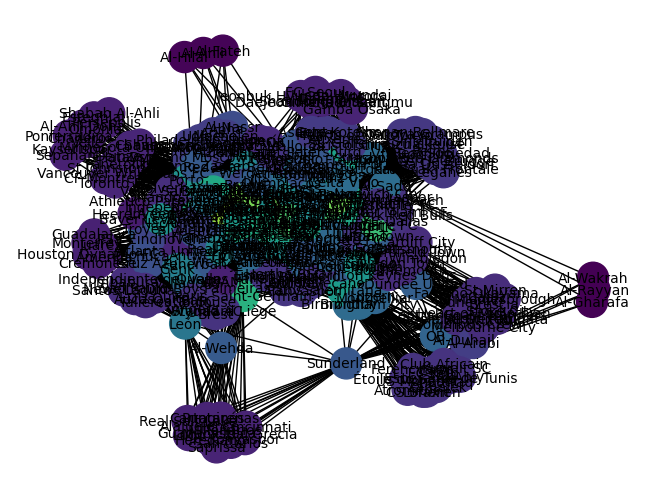

In [31]:
nx.draw(club_club_projectionupdated, pos=pos_club_club, with_labels=True, node_size=500, font_size=10, node_color=[degree_centrality[n] for n in club_club_projectionupdated.nodes()])

As this one is not working, do you think "player-country"  would work?
Prepare it, and test your answer.

Prepare the bipartite "club-country", and create two graphs, one where club is projected, and another where country is projected. What is the meaning of the edges in each case?

Save both projected graphs (weighted) as _graphml_. Include the attributes for the nodes that will be projected.

__________

Go back to the [INTRO](https://dacss-cssmeths.github.io/Networks_intro/)